## **CLICKBAIT SPOILING BY SPOILER CLASSIFICATION**

### Srivatsav Venkatakrishnan
### Faculty of Engineering, Environment and Computing
### MSc. Data Science and Computational Intelligence

In [2]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.6 MB/s eta 0:00:00


In [3]:
# Transformers installation
! pip install datasets evaluate
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
dataset_path = '/content/drive/MyDrive/MS_Sriva_NLP/Task1/Dataset/'
print(os.listdir(dataset_path))

['validation.jsonl', 'README.md', 'train.jsonl', 'runs', 'checkpoint-500', 'checkpoint-1000', 'checkpoint-1500', 'LSTM_classifier.h5']


### **Load the dataset from the given path**

In [6]:
import pandas as pd
import json

## Define dictionaries to map between integer labels and their corresponding string representations
id2label = {0: "phrase", 1: "passage",2:"multi"}
label2id = {"phrase": 0, "passage": 1,"multi":2}
## These dictionaries help convert between numeric labels (0, 1, 2) and their textual counterparts ("phrase," "passage," "multi")

def load_data_from_file(file_name):
    data_list = []

    with open(dataset_path + file_name) as file:
        for line in file:
            data = json.loads(line)

            # Extract data from JSON
            tweet = data['postText'][0]
            article_title = data['targetTitle']
            article = ' '.join(data['targetParagraphs'])
            label = data['tags'][0]

            # Ensure label is one of the specified categories
            valid_labels = ['phrase', 'phrases', 'passage', 'multi']

            if label not in valid_labels:
                print("Invalid label:", label)
                continue

            # Combine text and labels
            text = tweet + ' - ' + article_title + article
            #is_clickbait = label in ['phrase', 'phrases','multi']

            data_list.append({'text': text,'category':label})

    return pd.DataFrame(data_list)


In [7]:
# Load the train datasets
train_data = load_data_from_file('train.jsonl')
train_data.head(3)

,text,category
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage
1,NASA sets date for full recovery of ozone hole...,phrase
2,This is what makes employees happy -- and it's...,phrase


In [8]:
train_data['category'].value_counts()


phrase     1367
passage    1274
multi       559
Name: category, dtype: int64

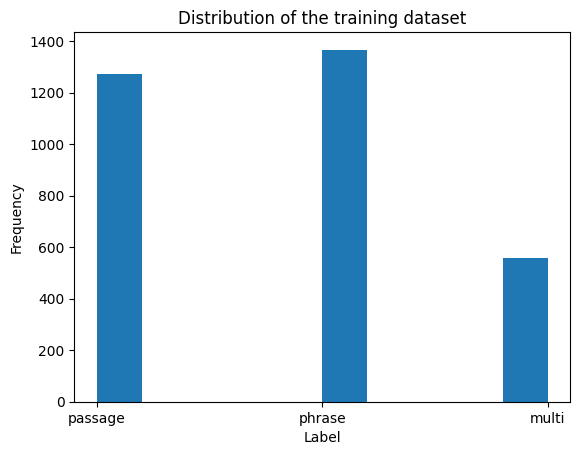

In [9]:
import matplotlib.pyplot as plt
# To Plot the distribution of training datasets
labels = train_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the training dataset')
plt.show()


In [10]:
# Combine all text data into a single string
from wordcloud import WordCloud
text_data = train_data['text']
text_train = ' '.join(text_data)

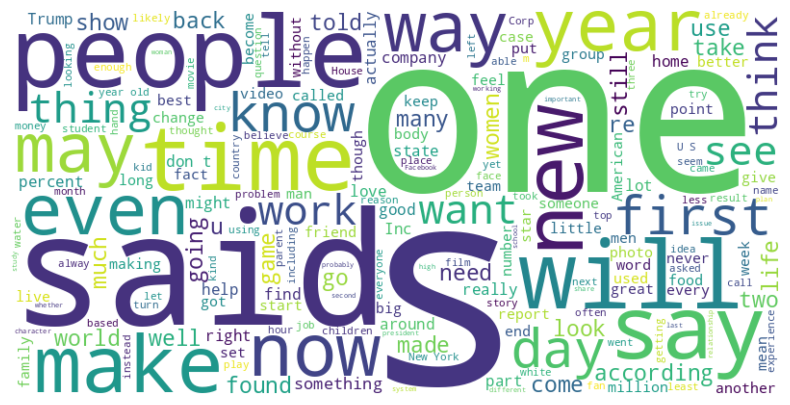

In [11]:
# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_train)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
# Load the valid datasets
validation_data = load_data_from_file('validation.jsonl')
validation_data.head(3)

,text,category
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi
2,Here’s how much you should be tipping your hai...,phrase


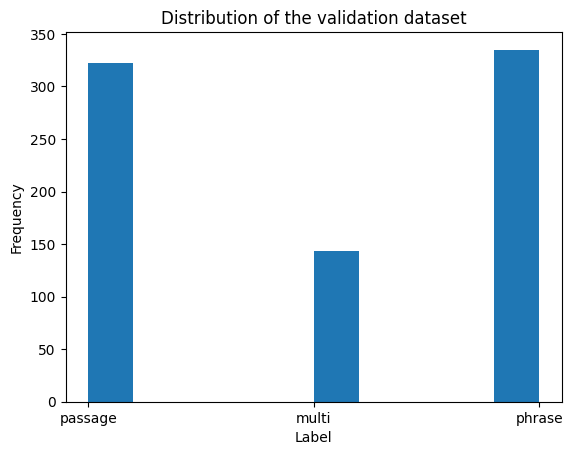

In [13]:
# Plot the distribution of validation dataset
labels = validation_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the validation dataset')
plt.show()

In [14]:
# Combine all text data into a single string
text_data = validation_data['text']
text_valid = ' '.join(text_data)

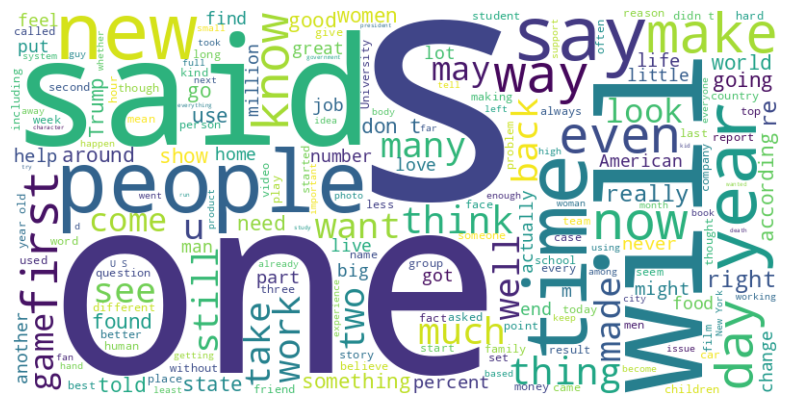

In [15]:
# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_valid)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# Import NLTK and download the stopwords dataset if not already downloaded
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
# Function to clean and preprocess text
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

class Cleaner():
  def __init__(self):
    pass
  def put_line_breaks(self,text):
    text = text.replace('</p>','</p>\n')
    return text
  def remove_html_tags(self,text):
    cleantext = BeautifulSoup(text, "lxml").text
    return cleantext
  def clean(self,text):
    text = self.put_line_breaks(text)
    text = self.remove_html_tags(text)
    return text

In [18]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2023-11-02 12:02:23--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-02 12:02:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-02 12:02:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [19]:
path_to_glove_file = os.path.join(
    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
)


In [20]:
cleaner = Cleaner()
train_data['text_cleaned'] = train_data['text'].apply(cleaner.clean)
train_data.head(3)

,text,category,text_cleaned
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,"Wes Welker Wanted Dinner With Tom Brady, But P..."
1,NASA sets date for full recovery of ozone hole...,phrase,NASA sets date for full recovery of ozone hole...
2,This is what makes employees happy -- and it's...,phrase,This is what makes employees happy -- and it's...


In [21]:
validation_data['text_cleaned'] = validation_data['text'].apply(cleaner.clean)
validation_data.head(3)

,text,category,text_cleaned
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,Five Nights at Freddy’s Sequel Delayed for Wei...
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,Why Arizona Sheriff Joe Arpaio’s fate could ha...
2,Here’s how much you should be tipping your hai...,phrase,Here’s how much you should be tipping your hai...


In [22]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split



In [23]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['text_cleaned'])
sequences = tokenizer.texts_to_sequences(train_data['text_cleaned'])

# Pad sequences to a fixed length
max_sequence_length = 100  # You can choose a different sequence length according to the project requirements
X_train = pad_sequences(sequences, maxlen=max_sequence_length)


In [24]:
# Load GloVe embeddings
embedding_index = {}
embedding_dim = 100  # You should choose the dimension that matches your GloVe embeddings

with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [25]:
# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(validation_data['text_cleaned'])
sequences = tokenizer.texts_to_sequences(validation_data['text_cleaned'])

# Pad sequences to a fixed length
max_sequence_length = 100  # You can choose an appropriate sequence length
X_valid = pad_sequences(sequences, maxlen=max_sequence_length)


## **Label Encoder**

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data['category'].tolist())
train_data['label'] = le.transform(train_data['category'].tolist())

In [27]:
le = preprocessing.LabelEncoder()
le.fit(validation_data['category'].tolist())
validation_data['label'] = le.transform(validation_data['category'].tolist())

In [28]:
train_data.head(3)

,text,category,text_cleaned,label
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,"Wes Welker Wanted Dinner With Tom Brady, But P...",1
1,NASA sets date for full recovery of ozone hole...,phrase,NASA sets date for full recovery of ozone hole...,2
2,This is what makes employees happy -- and it's...,phrase,This is what makes employees happy -- and it's...,2


In [29]:
validation_data.head(3)

,text,category,text_cleaned,label
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,Five Nights at Freddy’s Sequel Delayed for Wei...,1
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,Why Arizona Sheriff Joe Arpaio’s fate could ha...,0
2,Here’s how much you should be tipping your hai...,phrase,Here’s how much you should be tipping your hai...,2


## **Initialize Model**

In [30]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(
    num_words,
    embedding_dim,
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [31]:
model = Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2 )) #dropout to deactivate some of the neurons to make sure that it doesn't overfit model at every epoch
model.add(Dense(3, activation='softmax'))  #binary classification

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1042435 (3.98 MB)
Trainable params: 42435 (165.76 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [33]:
# Train the model using appropriate number of epoch
epochs = 100
model_name = "LSTM_classifier"
checkpoint_filepath = "/content/drive/MyDrive/MS_Sriva_NLP/Task1/Dataset/"+model_name+".h5"


In [34]:
import tensorflow as tf
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_loss',
    verbose = 1,
    mode ='min',
    save_best_only=True,
    save_weights_only=True,
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode = 'min',
                                factor=0.5, patience=5, min_lr=0.00001, verbose=1)
history = model.fit(X_train, train_data['label'].values, validation_data=(X_valid, validation_data['label'].values), epochs=epochs, batch_size=32,callbacks = [reduce_lr,checkpoint_callback]
)


Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 1.0455 - accuracy: 0.4378
Epoch 1: val_loss improved from inf to 1.04521, saving model to /content/drive/MyDrive/MS_Sriva_NLP/Task1/Dataset/LSTM_classifier.h5
100/100 [==============================] - 25s 170ms/step - loss: 1.0455 - accuracy: 0.4378 - val_loss: 1.0452 - val_accuracy: 0.3950 - lr: 0.0010
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 1.0246 - accuracy: 0.4634
Epoch 2: val_loss did not improve from 1.04521
100/100 [==============================] - 18s 184ms/step - loss: 1.0246 - accuracy: 0.4634 - val_loss: 1.0536 - val_accuracy: 0.4087 - lr: 0.0010
Epoch 3/100
100/100 [==============================] - ETA: 0s - loss: 1.0092 - accuracy: 0.4900
Epoch 3: val_loss did not improve from 1.04521
100/100 [==============================] - 17s 172ms/step - loss: 1.0092 - accuracy: 0.4900 - val_loss: 1.0468 - val_accuracy: 0.4288 - lr: 0.0010
Epoch 4/100
100/100 [====================

## **Evaluate Model**

In [35]:
from sklearn.metrics import classification_report

In [36]:
preds = model.predict(X_valid)
preds.shape

25/25 [==============================] - 1s 29ms/step


(800, 3)

In [37]:
#To print the validation accuracy report
predicted = np.argmax(preds[:],axis=1)
GT = validation_data['label'].values
print("validation accuracy report")
print(classification_report(GT,predicted))

validation accuracy report
              precision    recall  f1-score   support

           0       0.16      0.04      0.07       143
           1       0.41      0.48      0.44       322
           2       0.42      0.47      0.44       335

    accuracy                           0.40       800
   macro avg       0.33      0.33      0.32       800
weighted avg       0.37      0.40      0.37       800



In [38]:
from google.colab import runtime
runtime.unassign()

References :

1. https://simpletransformers.ai/docs/multi-class-classification/
2. https://github.com/webis-de/acl22-clickbait-spoiling/blob/main/spoiler-type-classification/classification-bert.ipynb
3. https://chat.openai.com/
